In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [193]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [194]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [195]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [196]:
#drop id columns
train_Id = train.Id
test_Id = test.Id

train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)


In [197]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (1460, 80)
test size: (1459, 79)


# 1. Data Pre-procesing
---

### Target Variable

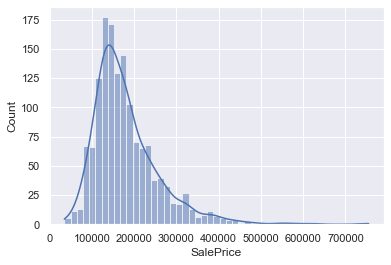

In [198]:
sns.histplot(train, x="SalePrice", kde="True")

In [199]:
print("Kurtosis: {}".format(train["SalePrice"].kurt()))
print("Skewness: {}".format(train["SalePrice"].skew()))

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


**best estimators for SalePrice**

In [200]:
corrmat = train.corr()
best_features = corrmat["SalePrice"].nlargest(10)
best_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

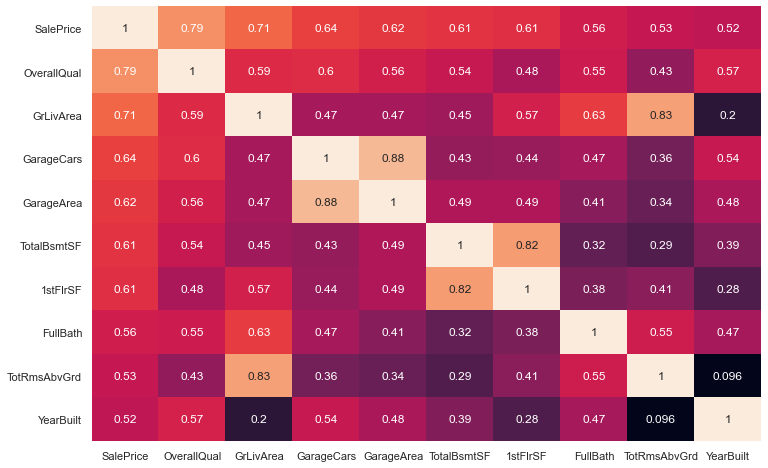

In [201]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat.loc[best_features.index, best_features.index], cbar=False, annot=True)

In [202]:
best_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

drop some feature correlated with each other

In [203]:
# best_index = best_features.index.drop(["1stFlrSF", "GarageArea", "TotRmsAbvGrd"])
# sns.pairplot(train[best_index])

**Drop outliers**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


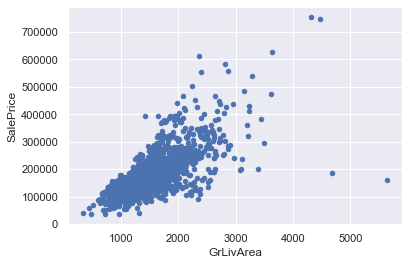

In [204]:
train.plot.scatter(y="SalePrice", x="GrLivArea")

In [205]:
def remove_outliers(df):
    outliers = df[(df["GrLivArea"]>4000) & (df["SalePrice"]<300000)].index
    df.drop(outliers, inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


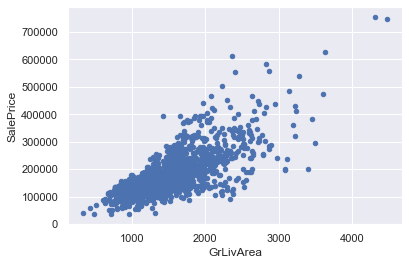

In [206]:
remove_outliers(train)
train.plot.scatter(x="GrLivArea", y="SalePrice")

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



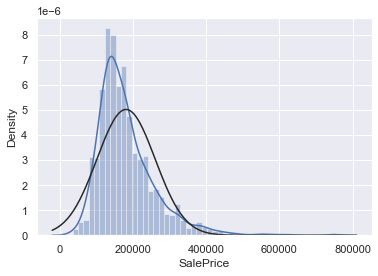

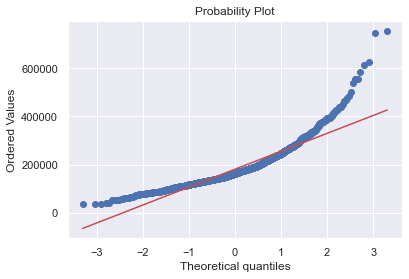

In [207]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

**Log transformation of the target varaible** (to be closer to normality)

In [208]:
def log_y(df):
    df["SalePrice"] = np.log(df["SalePrice"])

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



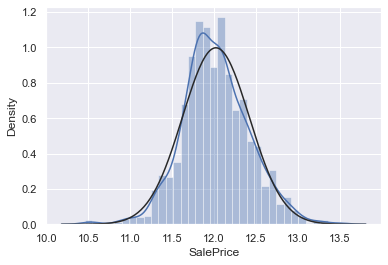

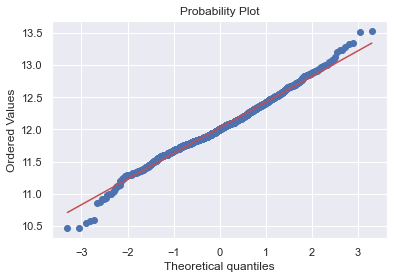

In [209]:
log_y(train)
# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

### Features engineering

Concatenate the train and test set

In [210]:
def full_dataset(train, test):
    ntrain = len(train)
    ntest = len(test)
    dataset = pd.concat([train,test])
    # dataset.drop("SalePrice", axis=1, inplace=True)

    print(f"TRAINING SIZE {train.shape}")
    print(f"TESTING SIZE {test.shape}")
    print("---")
    print("---")
    print(f"CONCATENATION {dataset.shape}")
    return dataset, ntrain

In [211]:
dataset, ntrain = full_dataset(train, test)

TRAINING SIZE (1458, 80)
TESTING SIZE (1459, 79)
---
---
CONCATENATION (2917, 80)


**Missing values (NaN)**

In [212]:
missing_rate = (dataset.isnull().sum() / dataset.shape[0]) * 100
missing_data = pd.concat([dataset.isnull().sum(), missing_rate], axis=1, keys=["total", "rate"])
missing_data.sort_values(by="total", ascending=False).head(35)

,total,rate
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
SalePrice,1459,50.017141
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageCond,159,5.450806
GarageFinish,159,5.450806
GarageQual,159,5.450806


In [213]:
dataset.isna().any(0).value_counts()

False    45
True     35
dtype: int64

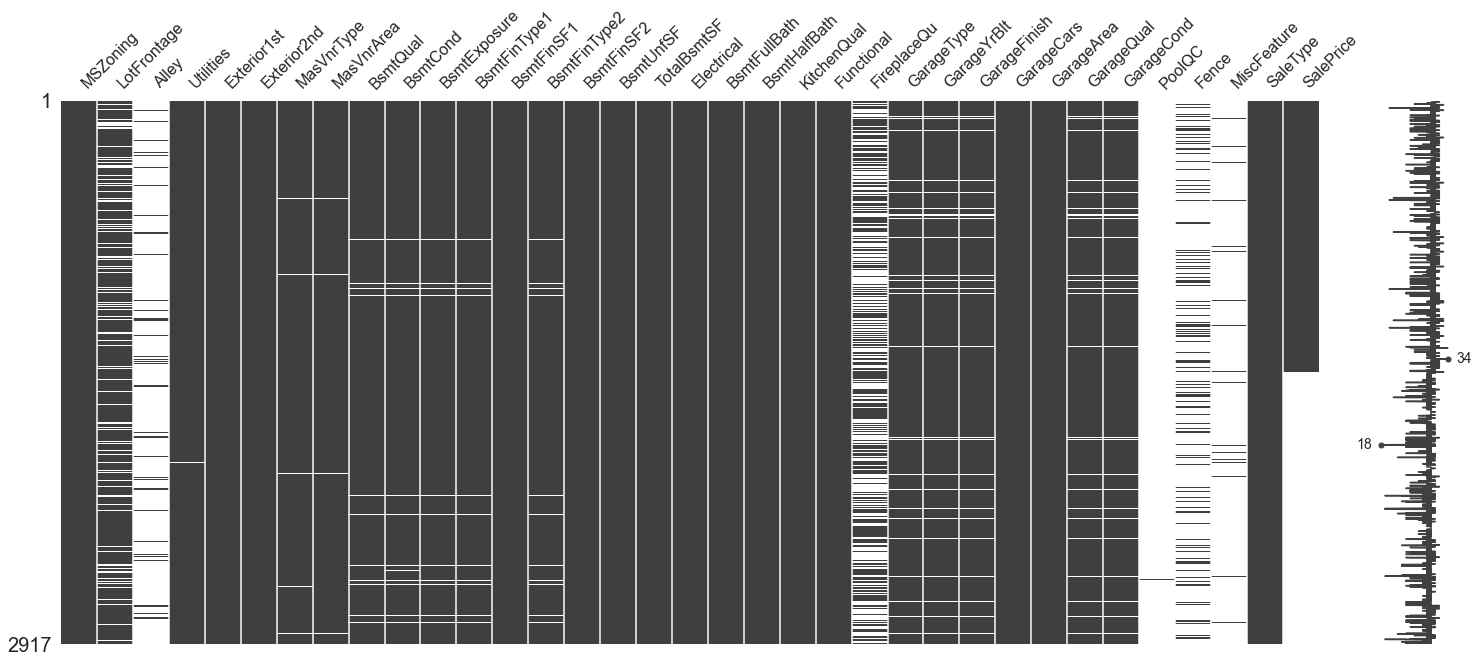

In [214]:
import missingno as msno
col_with_nan = dataset.loc[:,dataset.isna().any(0)]
msno.matrix(col_with_nan)

→ NaN values give info about house's features:
- *Basement*: 97.5%
- *Garage*: 95%
- *Fireplace*: 83%
- *Fence*: 20%
- *Alley*: 7%
- *Pool*: 1%

**Data Correlation**

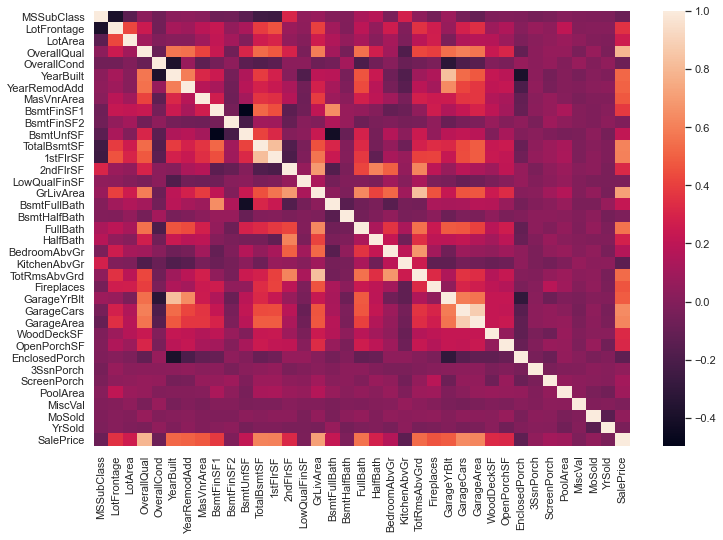

In [215]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=1)

**Imputing missing values**

replace by None

In [216]:
def fill_none(df):
    replace_by_none = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "MasVnrType", "MSSubClass", 
    "GarageCond", "GarageType", "GarageFinish", "GarageQual",
    "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
    
    for col in replace_by_none:
        df[col].fillna("None", inplace=True)

In [217]:
# fill_none(dataset)

replace by 0

In [218]:
def fill_0(df):
    replace_by_zero = ["MasVnrArea", "GarageYrBlt", "GarageArea", "GarageCars", "MasVnrArea", 
                       "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

    for col in replace_by_zero:
        df[col].fillna(0, inplace=True)

In [219]:
# fill_0(dataset)

**LotFrontage**: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. *- idea from this [beautifull notebook](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)*

In [220]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

replace by most frequent

In [221]:
def fill_mode(df):
    replace_by_mode = ["Electrical", "SaleType", "Exterior1st", 
                       "Exterior2nd", "KitchenQual", "MSZoning", "Functional"]
    
    for col in replace_by_mode:
        df[col] .fillna(df[col].mode()[0], inplace=True)

In [222]:
# fill_mode(dataset)

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [223]:
dataset["Utilities"].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [224]:
# dataset.drop('Utilities', axis=1, inplace=True, errors="ignore")

**create the full imputation function**

In [225]:
def imputation(df):
    print("IMPUTATION")
    print("---")
    print (f"before: {df.isna().sum().sum()}")
    fill_0(df)
    fill_mode(df)
    fill_none(df)
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    df.drop('Utilities', axis=1, inplace=True, errors="ignore")
    print (f"after: {df.isna().sum().sum()}")
    print("---")


Check if there is reamining missing value

In [226]:
imputation(dataset)
dataset.drop("SalePrice", axis=1).isna().sum().sum()

IMPUTATION
---
before: 14931
after: 1459
---


0

It remains no missing value.

### More features engineering

In [227]:
dataset.dtypes.value_counts()

object     42
int64      25
float64    12
dtype: int64

**transform numerical variables which are categorical**

In [228]:
def num_to_cat(df):
    df["MSSubClass"] = df["MSSubClass"].astype("str")
    df["MoSold"] = df["MoSold"].astype("str")
# dataset["YrSold"] = dataset["YrSold"].astype("str")

In [229]:
num_to_cat(dataset)
dataset.dtypes.value_counts()

object     44
int64      23
float64    12
dtype: int64

**label encoding some categorical data** *(contain information in their ordering)*

In [230]:
from sklearn.preprocessing import OrdinalEncoder

def label_encode(df):
    print("LABEL ENCODING")
    print("---")
    print(f"BEFORE:\n{df.dtypes.value_counts()}")
    order_mater = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
                   "HeatingQC", "CentralAir", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",  
                   "GarageCond", "PoolQC", "BsmtFinType1", "BsmtFinType1", "Functional", "LandSlope", 
                   "LotShape", "PavedDrive"]
    cat_to_int = OrdinalEncoder(dtype="int")
    df[order_mater] = cat_to_int.fit_transform(df[order_mater].values)
    print()
    print(f"AFTER:\n{df.dtypes.value_counts()}")
    print("---")

In [231]:
label_encode(dataset)

LABEL ENCODING
---
BEFORE:
object     44
int64      23
float64    12
dtype: int64

AFTER:
int64      41
object     26
float64    12
dtype: int64
---


**create new feature** *(by combining existing one)*

In [232]:
def feature_engineering(df):
    print("FEATURE ENGINEERING")
    print("---")
    print(f"before: {df.shape}")
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
    df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
    df["TotalBath"] = df["BsmtFullBath"] + 0.5 * df["BsmtHalfBath"] + \
                           df["FullBath"] + 0.5 * df["HalfBath"]
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    print(f"after: {df.shape}")
    print("---")

In [233]:
feature_engineering(dataset)
dataset.shape

FEATURE ENGINEERING
---
before: (2917, 79)
after: (2917, 84)
---


(2917, 84)

In [234]:
np.abs(dataset.corr().SalePrice).sort_values(ascending=False)[:20]

SalePrice       1.000000
TotalSF         0.825326
OverallQual     0.821404
GrLivArea       0.725211
GarageCars      0.681033
TotalBath       0.676678
GarageArea      0.656128
TotalBsmtSF     0.647563
1stFlrSF        0.620500
OverallGrade    0.607983
FullBath        0.595899
ExterQual       0.587213
YearBuilt       0.587043
BsmtQual        0.578564
YearRemodAdd    0.565992
TotRmsAbvGrd    0.537702
KitchenQual     0.537038
Fireplaces      0.491998
MasVnrArea      0.430569
HeatingQC       0.426052
Name: SalePrice, dtype: float64

#### Note:
- `TotalSF` is highly correlated with the SalePrice  
- `TotalSF`, `TotalBath` `ExterGrade` perform better than their detailled features
- creating order in `ExterQual` improve the correlation with SalePrice

**Skewed features**

In [235]:
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness.head(20)

MiscVal          21.950962
PoolQC           21.228518
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
LandSlope         4.975813
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
Functional        4.056212
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
GarageYrBlt       3.906642
GarageCond        3.596139
CentralAir        3.459334
GarageQual        3.074369
PavedDrive        2.979273
BsmtCond          2.862744
MasVnrArea        2.623068
dtype: float64

In [236]:
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")

35 features are skewed!


get closer to normality with [Box cox transformation ](https://www.statisticshowto.com/box-cox-transformation/).  

**Why not using log on skewed estimators to get normality?**  
↳ Beacause box cox give slightly better result

In [237]:
from scipy.special import boxcox1p

# def boxcox(df,threshold, lmbda):
#     num_col = df.select_dtypes(exclude="object").columns
#     skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
#     skewed_features = skewness[skewness > threshold].index
#     for feat in skewed_features:
#         df[feat] = boxcox1p(df[feat], lmbda)

def log_transform(df,threshold=0.5):
    num_data = df.select_dtypes(exclude="object")
    
    skewness = num_data.apply(lambda x: skew(x))
    skewness = skewness[abs(skewness) > 0.5]
    
    skewed_features = skewness.index
    df[skewed_features] = np.log1p(df[skewed_features])

In [238]:
# boxcox(dataset, threshold=0.75, lmbda=0.15)
log_transform(dataset)

In [239]:
# after boxcox: how many skewed estimator
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")
skewness.head(20)

28 features are skewed!


PoolQC          23.139722
PoolArea        15.631314
3SsnPorch        8.826656
LowQualFinSF     8.559041
Functional       5.459337
MiscVal          5.214687
TotalBsmtSF      4.966774
LandSlope        4.484784
GarageCond       4.317419
GarageYrBlt      3.926404
BsmtHalfBath     3.775149
GarageQual       3.526633
KitchenAbvGr     3.520694
CentralAir       3.459334
BsmtCond         3.319443
GarageGrade      3.240181
ExterCond        3.181304
PavedDrive       3.080474
ExterQual        3.060032
ScreenPorch      2.946085
dtype: float64

**Getting dummy categorical features**

In [240]:
dataset = pd.get_dummies(dataset)
dataset.shape

(2917, 264)

Split into train and test set

In [241]:
train = dataset[:ntrain]
test = dataset[ntrain:]

print(f"TRAINING shape: {train.shape}")
print(f"TESTING shape: {test.shape}")

TRAINING shape: (1458, 264)
TESTING shape: (1459, 264)


### Summary
let's begin again

In [242]:
def preprocessing():
    train = pd.read_csv("data/train.csv")
    test = pd.read_csv("data/test.csv")
    
    train.drop("Id", axis=1, inplace=True)
    test.drop("Id", axis=1, inplace=True)
        
    # work on the target of the train set
    remove_outliers(train)
    log_y(train)
    
    dataset, ntrain = full_dataset(train, test)
    imputation(dataset)
    
    # label encoding
    num_to_cat(dataset)
    label_encode(dataset)
    
    # add new features 
    feature_engineering(dataset)
    
    # arrange skewed estimator
#     boxcox(dataset, threshold=0.75, lmbda=0.15)
    log_transform(dataset)
    
    dataset = pd.get_dummies(dataset)
    
    train = dataset[:ntrain]
    test = dataset[ntrain:]
    
    print("---")
    print(f"FINAL TRAINING SIZE {train.shape}")
    print(f"FINAL TESTING SIZE {test.shape}")
    return train, test

In [243]:
train, test = preprocessing()

TRAINING SIZE (1458, 80)
TESTING SIZE (1459, 79)
---
---
CONCATENATION (2917, 80)
IMPUTATION
---
before: 15417
after: 1459
---
LABEL ENCODING
---
BEFORE:
object     44
int64      23
float64    12
dtype: int64

AFTER:
int64      41
object     26
float64    12
dtype: int64
---
FEATURE ENGINEERING
---
before: (2917, 79)
after: (2917, 84)
---
---
FINAL TRAINING SIZE (1458, 264)
FINAL TESTING SIZE (1459, 264)


# 2. Modeling
---

In [244]:
X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]

In [263]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, learning_curve

from sklearn.linear_model import LinearRegression

Mean Score: 0.12663791391056473


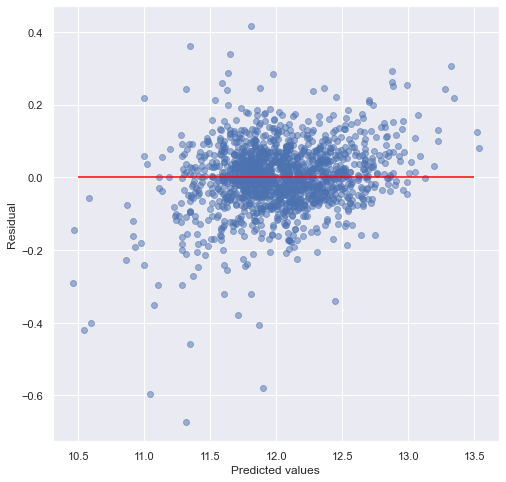

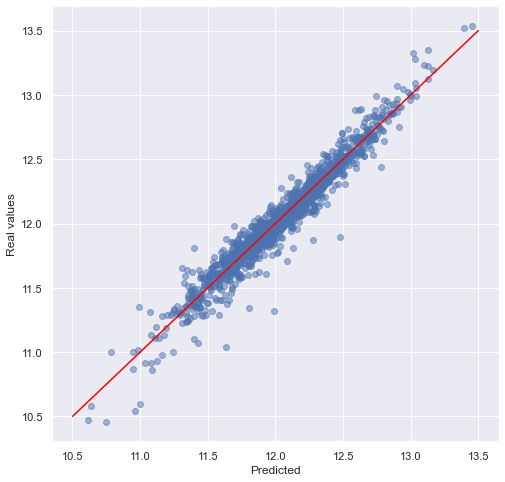

In [289]:
# simple regression line
model = make_pipeline(RobustScaler(), LinearRegression())

scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
score = np.sqrt(-scores.mean())
print(f"Mean Score: {score}")

model.fit(X_train, y_train)
y_pred = model.predict(X_train)

residual = y_train - y_pred

# Plot residual
plt.figure(figsize=(8,8))
plt.scatter(x=y_train, y=residual, alpha=0.5)
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.ylabel("Residual")
plt.xlabel("Predicted values")
plt.show()

# Plot prediction
plt.figure(figsize=(8,8))
plt.scatter(x=y_pred, y=y_train, alpha=0.5)
plt.plot([10.5,13.5], [10.5,13.5], color="red")
plt.ylabel("Real values")
plt.xlabel("Predicted")
plt.show()

-> try to create an influence plot

**With regularization**

In [290]:
# TODO L2 pred
# TODO L1 pred
# TODO Elastic net 
# Compared with our Compared Models classe
# Read Regularized Linear Models
# Read XGBOOST
# READ Stacked Regressions : Top 4% on LeaderBoard

In [246]:
import plotly.express as px
from sklearn.model_selection import cross_val_score, learning_curve

# create a class to keep track of the performance
class CompareModels():
    def __init__(self, models, X, y, scoring="neg_mean_squared_error"):
        self.models = models
        self.scoring = scoring
        self.names = []
        self.scores = []
        self.X = X
        self.y = y
        
    def get_scores(self):
        for name, model in self.models.items():
            score = cross_val_score(model, self.X, self.y, scoring=self.scoring, cv=7)
            score = np.sqrt(-score)
            self.names.append(name)
            self.scores.append(np.array(score))
            print(f"{name:-<20}> {score.mean():.2f} (+/-{(score).std():.2f})")


    def create_table(self):
        self.table = pd.DataFrame({model:scores for model,scores in zip(self.names, self.scores)})
        self.table.columns.name = "Model"
        self.table = self.table.unstack().reset_index(0)
        self.table = self.table.rename(columns={0:self.scoring})
            
    def summary_table(self):
        return self.table.groupby("Model").mean().reset_index()
    
    def box_plot(self):
        fig = px.box(self.table, y=self.scoring, x="Model")
        fig.update_layout(title="Compare Models")
        fig.show()
        
    def learning_curve(self):
        for name, model in self.models.items():
            N, train_score, val_score = learning_curve(model, self.X, self.y, cv=3, 
                                                       scoring="neg_mean_squared_error",
                                                       train_sizes=np.linspace(0.1,1,10))
            plt.figure(figsize=(12,8))
            plt.plot(N, np.sqrt(-train_score.mean(axis=1)), label="train score")
            plt.plot(N, np.sqrt(-val_score.mean(axis=1)), label="val score")
            plt.title(name)
            plt.legend()
    
    def recap(self):
        self.get_scores()
        self.create_table()
        self.box_plot()
        display(self.summary_table().sort_values(by=self.scoring,ascending=False))  

In [248]:
list_of_models = {
    "Lasso":lasso, 
#     "AdaBoost":AdaBoost, 
#     "SVM_linear":SVM_linear, 
#     "SVM_rbf":SVM_rbf, 
#     "Lasso":Lasso_reg, 
#     "Ridge":Ridge_reg, 
#     "KNN":KNN
}

In [247]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42, max_iter=10000))


In [249]:
models = CompareModels(list_of_models, X_train, y_train)
models.recap()

Lasso---------------> 0.11 (+/-0.01)


,Model,neg_mean_squared_error
0,Lasso,0.109578


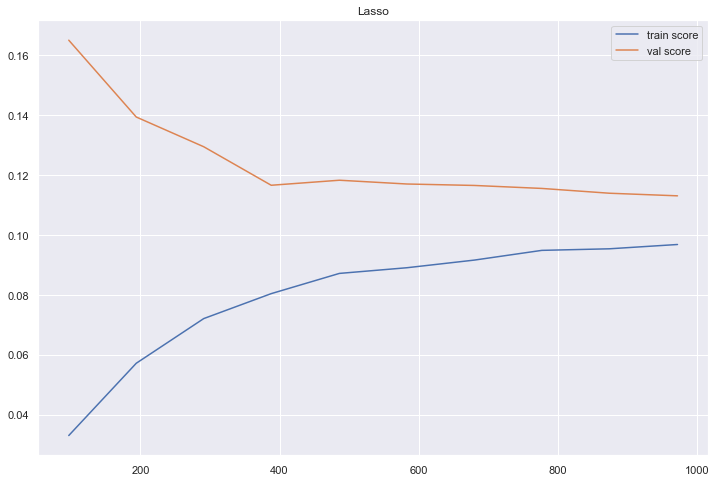

In [250]:
models.learning_curve()

## Diagnostic
[Python Diagnostic Plots for OLS Linear Regression (Plots Similar to R)](https://medium.com/@vijay.prayagala/python-diagnostic-plots-for-ols-linear-regression-plots-similar-to-r-e308091d6072)

create my own

In [251]:
import statsmodels.api as sm

In [252]:
model = sm.OLS(y_train, X_train).fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     90.74
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:51:47   Log-Likelihood:                 1386.8
No. Observations:                1458   AIC:                            -2306.
Df Residuals:                    1224   BIC:                            -1069.
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.02

In [253]:
#  imports

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.compat import lzip
import json
import numpy as np


class LinearRegressionResidualPlot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def fit(self):
        linear_model = sm.OLS(self.y, sm.add_constant(self.x)).fit()

        return linear_model

    @staticmethod
    def check_linearity_assumption(fitted_y, residuals):
        plot_1 = plt.figure()
        plot_1.axes[0] = sns.residplot(fitted_y, residuals,
                                       lowess=True,
                                       scatter_kws={'alpha': 0.5},
                                       line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

        plot_1.axes[0].set_title('Residuals vs Fitted')
        plot_1.axes[0].set_xlabel('Fitted values')
        plot_1.axes[0].set_ylabel('Residuals')
        plt.savefig("ResVsFitted.png")

    @staticmethod
    def check_residual_normality(residuals_normalized):
        qq = ProbPlot(residuals_normalized)
        plot_2 = qq.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
        plot_2.axes[0].set_title('Normal Q-Q')
        plot_2.axes[0].set_xlabel('Theoretical Quantiles')
        plot_2.axes[0].set_ylabel('Standardized Residuals')

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(residuals_normalized)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            plot_2.axes[0].annotate(i,
                                    xy=(np.flip(qq.theoretical_quantiles, 0)[r],
                                        residuals_normalized[i]))

        plt.savefig("Normality.png")

    @staticmethod
    def check_homoscedacticity(fitted_y, residuals_norm_abs_sqrt):
        plot_3 = plt.figure()
        plt.scatter(fitted_y, residuals_norm_abs_sqrt, alpha=0.5)
        sns.regplot(fitted_y, residuals_norm_abs_sqrt,
                    scatter=False,
                    ci=False,
                    lowess=True,
                    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
        plot_3.axes[0].set_title('Scale-Location')
        plot_3.axes[0].set_xlabel('Fitted values')
        plot_3.axes[0].set_ylabel("$\\sqrt{|Standardized Residuals|}$")

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residuals_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            plot_3.axes[0].annotate(i,
                                    xy=(fitted_y[i],
                                        residuals_norm_abs_sqrt[i]))
        plt.savefig("Homoscadasticity.png")

    @staticmethod
    def check_influcence(leverage, cooks, residuals_normalized):
        plot_4 = plt.figure()
        plt.scatter(leverage, residuals_normalized, alpha=0.5)
        sns.regplot(leverage, residuals_normalized,
                    scatter=False,
                    ci=False,
                    lowess=True,
                    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
        plot_4.axes[0].set_xlim(0, max(leverage) + 0.01)
        plot_4.axes[0].set_ylim(-3, 5)
        plot_4.axes[0].set_title('Residuals vs Leverage')
        plot_4.axes[0].set_xlabel('Leverage')
        plot_4.axes[0].set_ylabel('Standardized Residuals')

        # annotations
        leverage_top_3 = np.flip(np.argsort(cooks), 0)[:3]
        for i in leverage_top_3:
            plot_4.axes[0].annotate(i,
                                    xy=(leverage[i],
                                        residuals_normalized[i]))
        plt.savefig("Influence.png")

    def diagnostic_plots(self, linear_model):
        """
        :param linear_model: Linear Model Fit on the Data
        :return: None
        This method validates the assumptions of Linear Model
        """
        diagnostic_result = {}

        summary = linear_model.summary()
        #diagnostic_result['summary'] = str(summary)

        # fitted values
        fitted_y = linear_model.fittedvalues
        # model residuals
        residuals = linear_model.resid

        # normalized residuals
        residuals_normalized = linear_model.get_influence().resid_studentized_internal

        # absolute squared normalized residuals
        model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals_normalized))

        # leverage, from statsmodels internals
        leverage = linear_model.get_influence().hat_matrix_diag

        # cook's distance, from statsmodels internals
        cooks = linear_model.get_influence().cooks_distance[0]

        self.check_linearity_assumption(fitted_y, residuals)

        self.check_residual_normality(residuals_normalized)

        self.check_homoscedacticity(fitted_y, model_norm_residuals_abs_sqrt)

        self.check_influcence(leverage, cooks, residuals_normalized)

        # 1. Non-Linearity Test
        try:
            name = ['F value', 'p value']
            test = sms.linear_harvey_collier(linear_model)
            linear_test_result = lzip(name, test)
        except Exception as e:
            linear_test_result = str(e)
        diagnostic_result['Non_Linearity_Test'] = linear_test_result

        # 2. Hetroskedasticity Test
        name = ['Lagrange multiplier statistic', 'p-value',
                'f-value', 'f p-value']
        test = sms.het_breuschpagan(linear_model.resid, linear_model.model.exog)
        test_val = lzip(name, test)
        diagnostic_result['Hetroskedasticity_Test'] = test_val

        # 3. Normality of Residuals
        name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
        test = sms.jarque_bera(linear_model.resid)
        test_val = lzip(name, test)
        diagnostic_result['Residual_Normality_Test'] = test_val

        # 4. MultiCollnearity Test
        test = np.linalg.cond(linear_model.model.exog)
        test_val = [('condition no',test)]
        diagnostic_result['MultiCollnearity_Test'] = test_val

        # 5. Residuals Auto-Correlation Tests
        test = sms.durbin_watson(linear_model.resid)
        test_val = [('p value', test)]
        diagnostic_result['Residual_AutoCorrelation_Test'] = test_val

        json_result = json.dumps(diagnostic_result)
        return summary, json_result

/Users/axel/ml/venv/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning:

invalid value encountered in sqrt

/Users/axel/ml/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/Users/axel/ml/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/Users/axel/ml/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the fol

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.946
 Model:                            OLS   Adj. R-squared:                  0.935
 Method:                 Least Squares   F-statistic:                     91.29
 Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
 Time:                        09:51:47   Log-Likelihood:                 1394.5
 No. Observations:                1458   AIC:                            -2319.
 Df Residuals:                    1223   BIC:                            -1077.
 Df Model:                         234                                         
 Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------

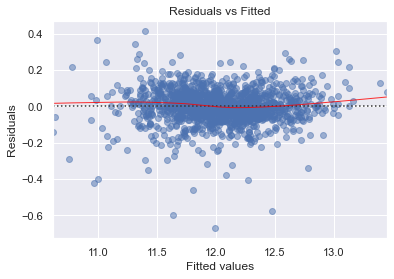

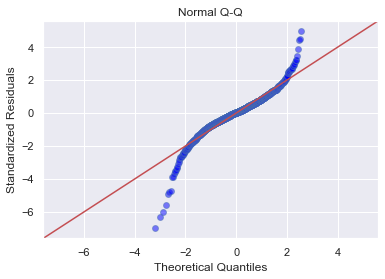

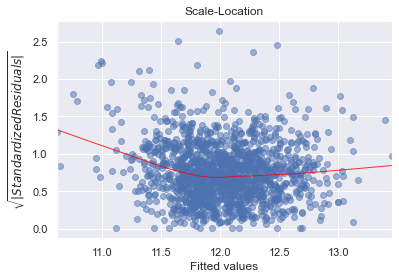

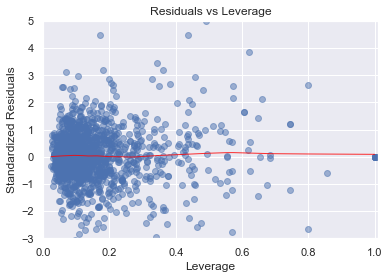

In [254]:
diagnostic = LinearRegressionResidualPlot(X_train, y_train)
lm = diagnostic.fit()
diagnostic.diagnostic_plots(lm)

Text(0, 0.5, 'Residuals')

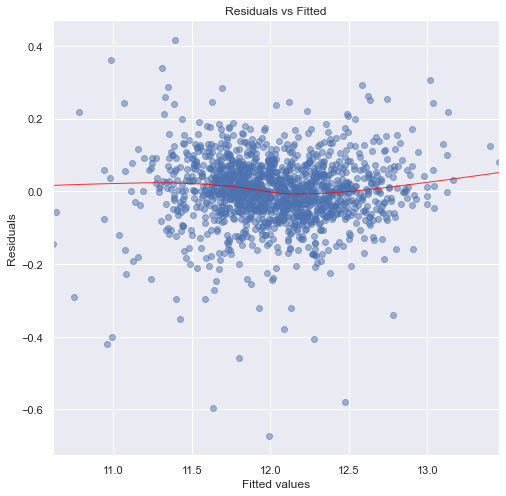

In [255]:
# 1. Check for linearity with residual plot
res = model.resid
y_fitted = model.fittedvalues
plt.figure(figsize=(8,8))
sns.regplot(x=y_fitted, 
            y=res,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

seems to be linear

/Users/axel/ml/venv/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning:

invalid value encountered in sqrt



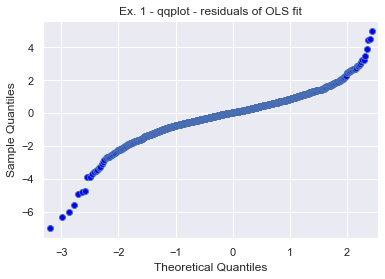

In [256]:
# 2. Check for normality -> QQ plot
from statsmodels.graphics.gofplots import ProbPlot

residuals_normalized = model.get_influence().resid_studentized_internal
res = mod_fit.resid
pplot = sm.ProbPlot(residuals_normalized)

fig = pplot.qqplot(line="s")
plt.title("Ex. 1 - qqplot - residuals of OLS fit")
plt.show()

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



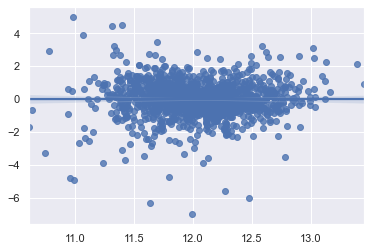

In [257]:
# 3. Check for constant erro term
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals_normalized))
sns.regplot(y_fitted, residuals_normalized)

In [258]:
# influneces
leverage = model.get_influence().hat_matrix_diag
cooks = model.get_influence().cooks_distance[0]

/Users/axel/ml/venv/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning:

invalid value encountered in sqrt

/Users/axel/ml/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/Users/axel/ml/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/Users/axel/ml/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



# 3. Submission 

In [259]:
final_model = lasso
final_model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso',
                 Lasso(alpha=0.0005, max_iter=10000, random_state=42))])

In [260]:
X_test = test.drop("SalePrice", axis=1)

In [261]:
y_pred = final_model.predict(X_test)
y_pred = np.exp(y_pred)

In [262]:
submission =pd.DataFrame({"Id":test_ID, "SalePrice":y_pred})
submission.to_csv("data/my_submision_V2.csv", index=False)

NameError: name 'test_ID' is not defined

In [ ]:
cat "data/my_submision.csv"

In [ ]:
cat "data/my_submision_V2.csv"